In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr

import wrangle as w

## Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

opening data from local file


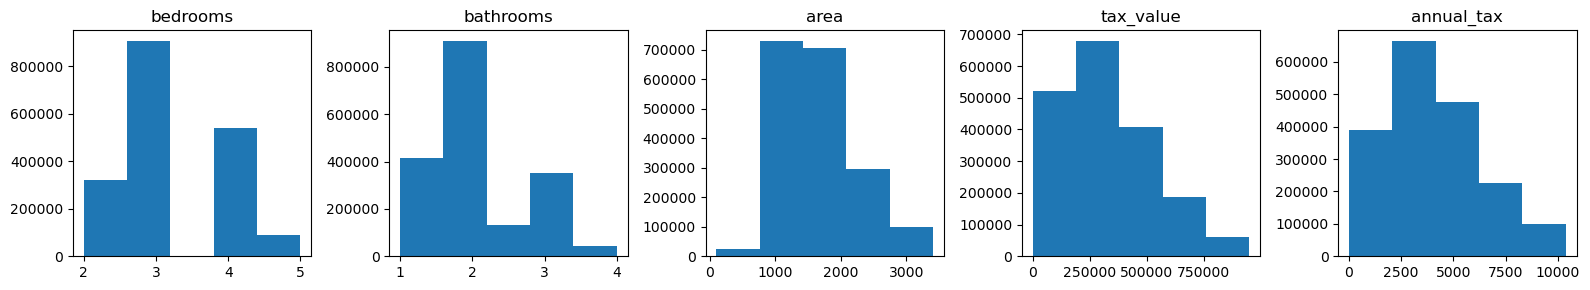

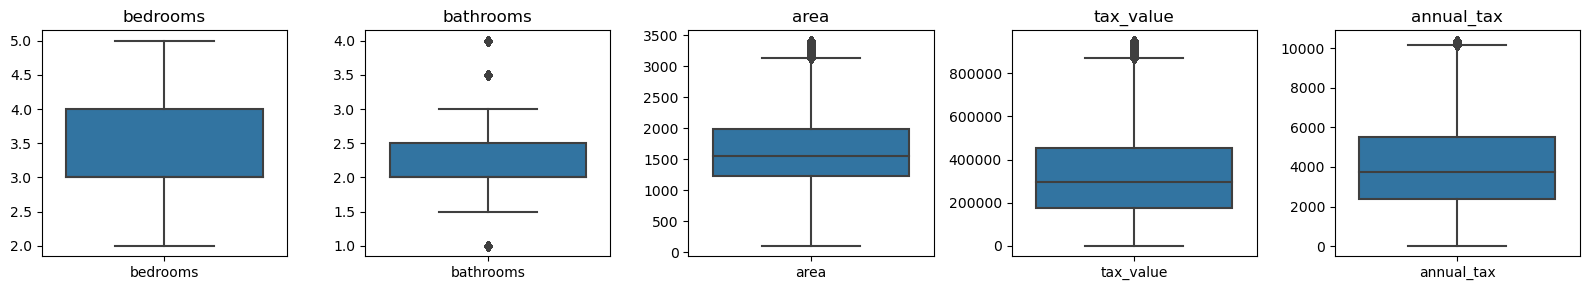

In [2]:
train, validate, test = w.wrangle_zillow()

## Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [18]:
def plot_variable_pairs(df):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    sample = df.sample(1000)
    # create a pairplot
    sns.pairplot(sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    plt.show()

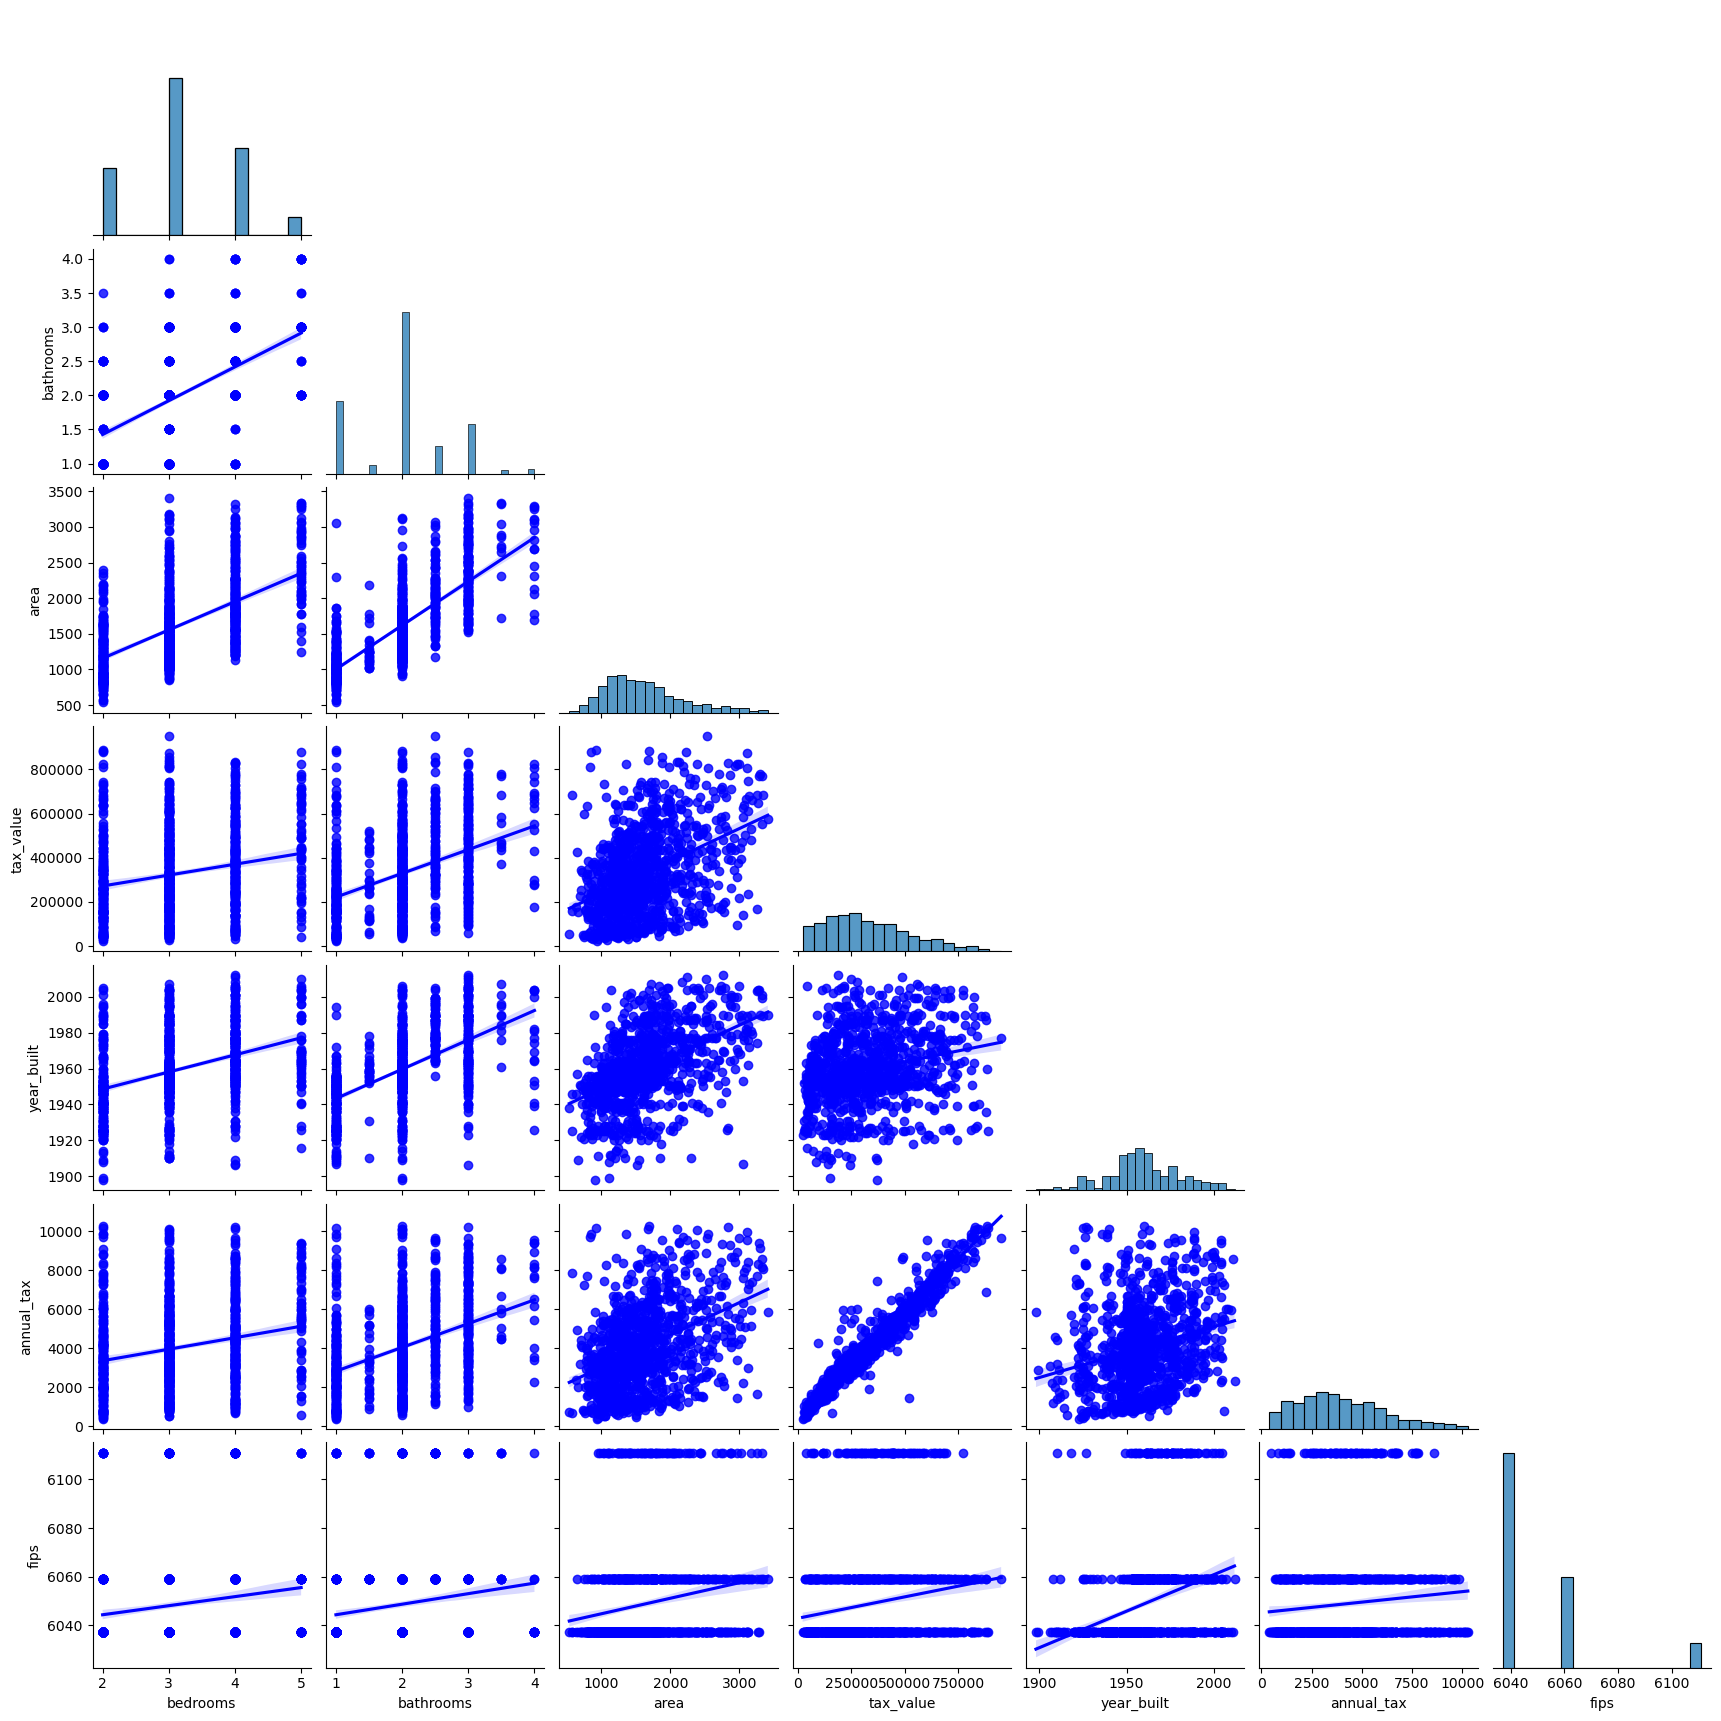

In [19]:
plot_variable_pairs(train)

## Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.


In [21]:
def plot_categorical_and_continuous_vars(df, cat_cols, cont_cols):
    '''
    This function will take in a DataFrame and a list of categorical and continuous
    variable columns, then display visualizations for each pair of columns
    '''
    # cycle through all the categorical columns
    for cat_col in cat_cols:
        # cycle through all the continuous columns
        for cont_col in cont_cols:
            plt.subplot(311)
            # create a boxplot
            sns.boxplot(x=cat_col, y=cont_col, data=df)
            plt.subplot(312)
            # create a violinplot
            sns.violinplot(x=cat_col, y=cont_col, data=df)
            plt.subplot(313)
            # create a barplot
            sns.barplot(x=cat_col, y=cont_col, data=df)
            plt.show()

In [22]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips
1654597,3,1.0,947,128661,1954,1870.84,6037
328510,3,2.0,1076,244696,1950,3160.45,6037
599581,2,2.0,897,186833,1942,2499.79,6037
967268,4,2.5,2520,407094,1977,4680.38,6059
1495491,3,2.0,1922,134523,1976,1467.24,6059


In [23]:
cat_cols= ['bedrooms', 'bathrooms', 'fips']
cont_cols= ['area', 'tax_value', 'year_built', 'annual_tax']

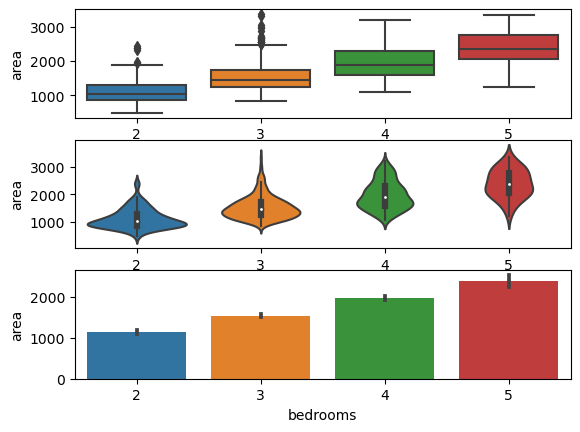

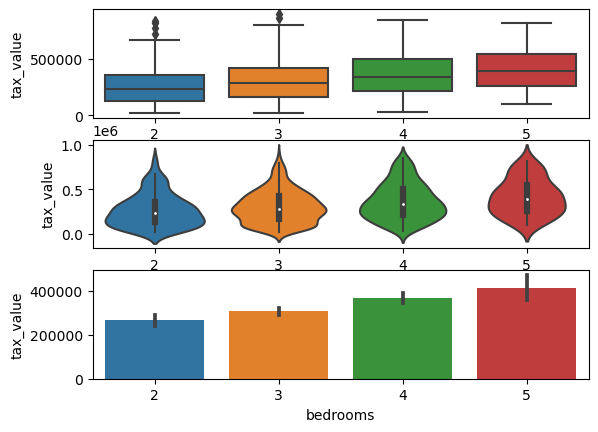

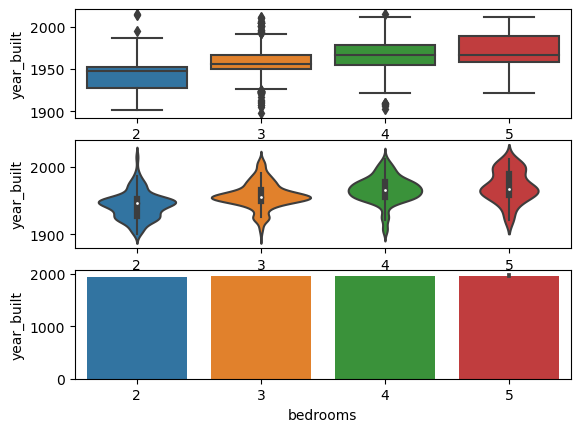

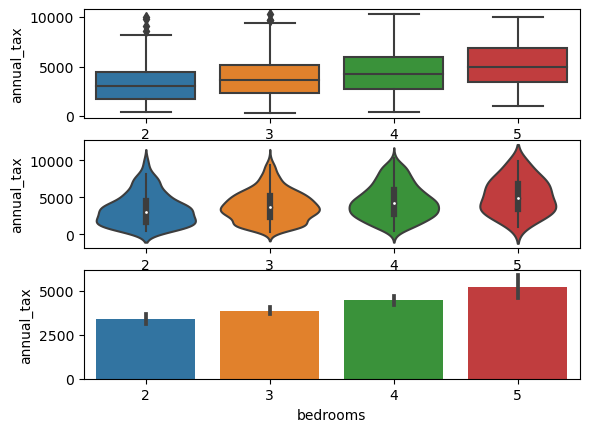

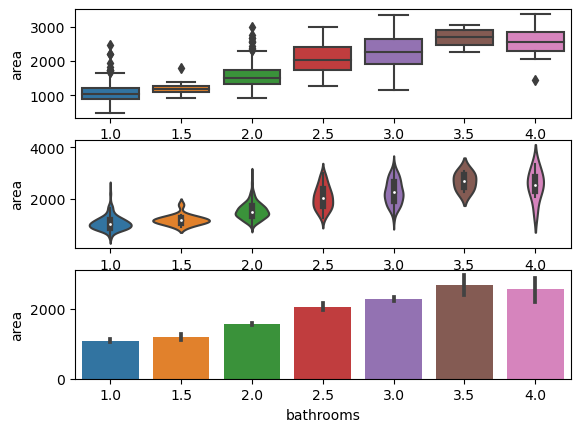

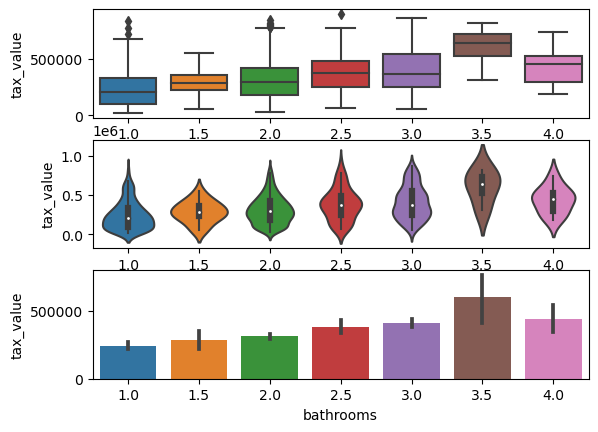

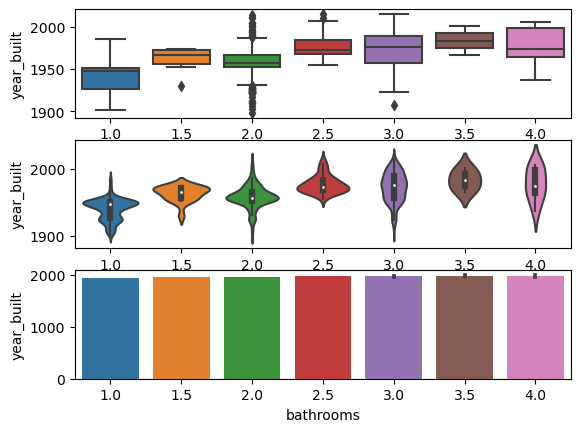

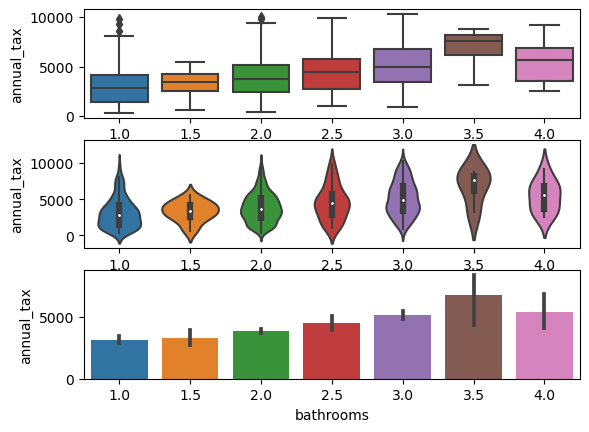

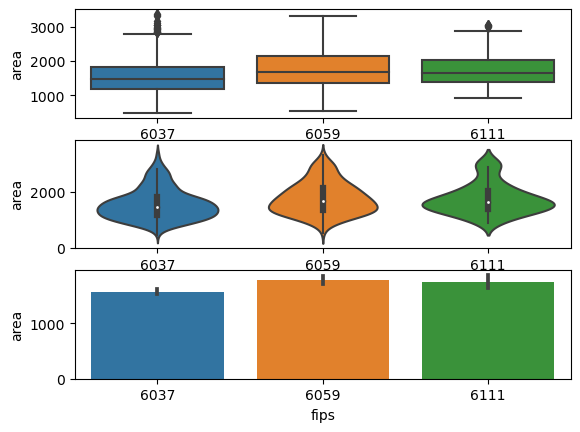

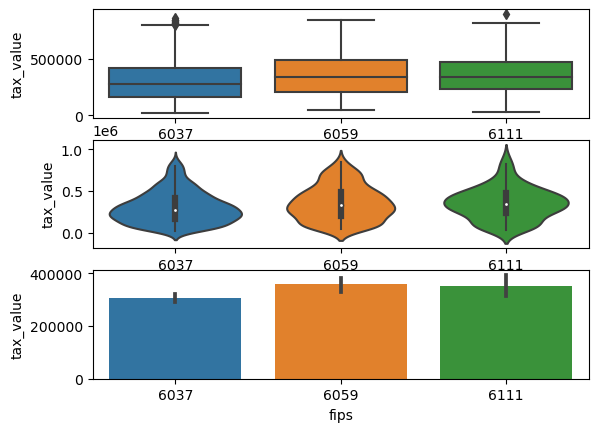

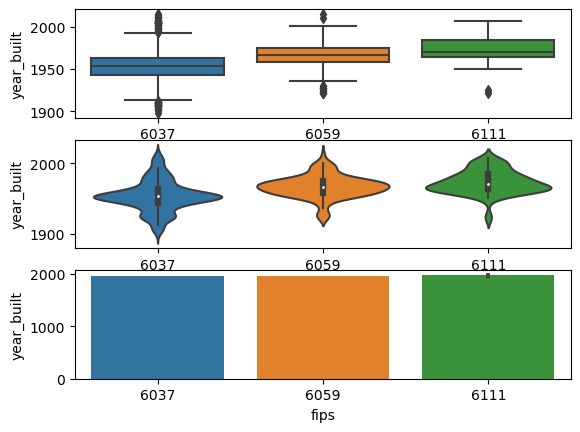

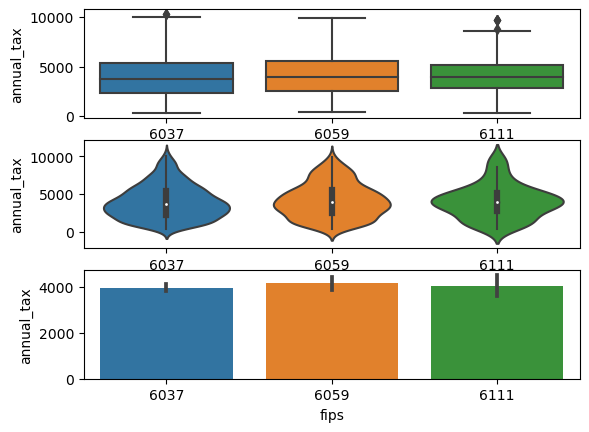

In [24]:
plot_categorical_and_continuous_vars(train.sample(1000), cat_cols, cont_cols)

In [9]:
vis_sample = train.sample(1000)

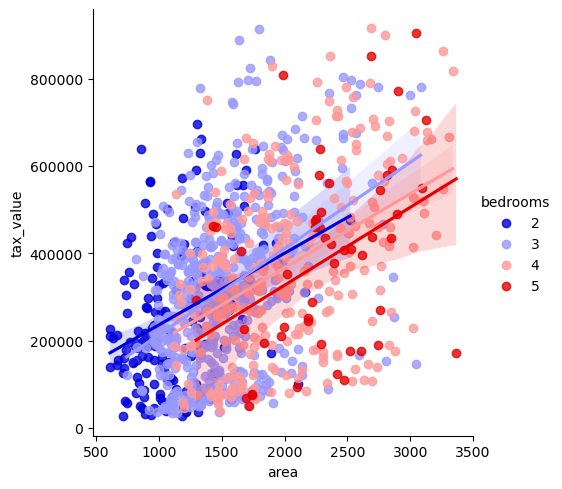

In [10]:
sns.lmplot(data=vis_sample,
           x='area',
           y='tax_value',
           hue='bedrooms',
           scatter=True,
           palette='seismic')
plt.show()

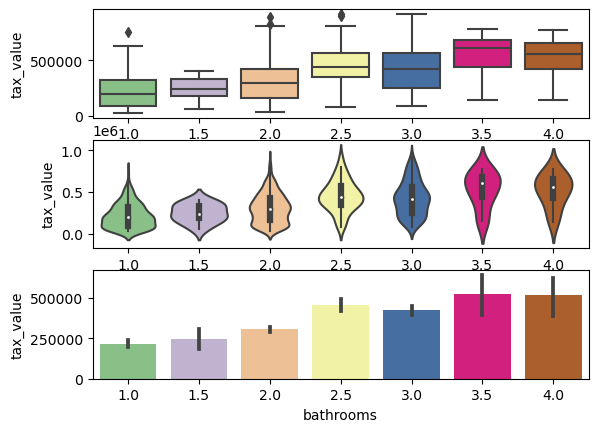

In [11]:
plt.subplot(311)
sns.boxplot(x='bathrooms', y='tax_value', data=vis_sample, palette='Accent')
plt.subplot(312)
sns.violinplot(x='bathrooms', y='tax_value', data=vis_sample, palette='Accent')
plt.subplot(313)
sns.barplot(x='bathrooms', y='tax_value', data=vis_sample, palette='Accent')
plt.show()

In [12]:
(1855276 / 2152863) - (1665830 / 2152863)

0.087997239025428

In [13]:
br_1 = train[train.bedrooms == 1]
br_2 = train[train.bedrooms == 2]
br_3 = train[train.bedrooms == 3]
br_4 = train[train.bedrooms == 4]
br_5 = train[train.bedrooms == 5]

In [14]:
train[train.bedrooms == 2]

,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips
599581,2,2.0,897,186833,1942,2499.79,6037
232947,2,1.0,765,218015,1948,2830.39,6037
562823,2,1.0,1066,428442,1940,5504.31,6037
1909164,2,2.0,1294,362435,1950,4708.13,6037
1736522,2,2.0,1802,119495,1949,1629.11,6037
...,...,...,...,...,...,...,...
2429,2,2.0,1282,84411,1988,1866.11,6037
1902537,2,1.0,1275,286920,1955,3491.04,6059
554089,2,1.0,1214,277388,1939,3641.91,6037
877535,2,1.0,832,52971,1950,975.09,6037


In [15]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips
1654597,3,1.0,947,128661,1954,1870.84,6037
328510,3,2.0,1076,244696,1950,3160.45,6037
599581,2,2.0,897,186833,1942,2499.79,6037
967268,4,2.5,2520,407094,1977,4680.38,6059
1495491,3,2.0,1922,134523,1976,1467.24,6059


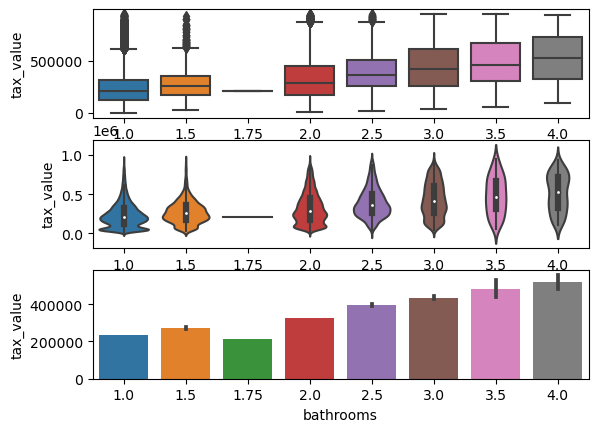

In [16]:
plt.subplot(311)
sns.boxplot(x='bathrooms', y='tax_value', data=br_2)
plt.subplot(312)
sns.violinplot(x='bathrooms', y='tax_value', data=br_2)
plt.subplot(313)
sns.barplot(x='bathrooms', y='tax_value', data=br_2)
plt.show()

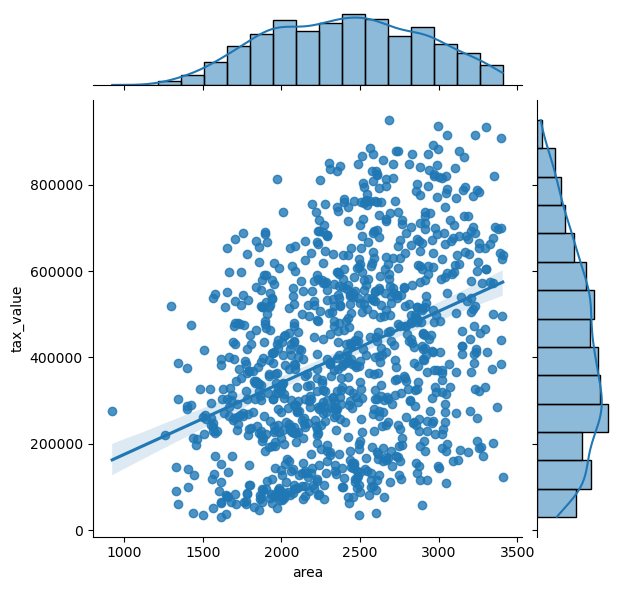

In [17]:
sns.jointplot(x="area", y="tax_value", data=br_5.sample(1000),  kind='reg')
plt.show()

<AxesSubplot:>

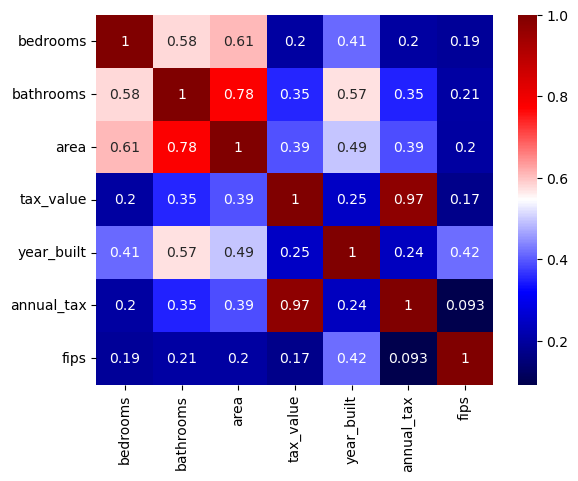

In [5]:
sns.heatmap(train.corr(method='spearman'), cmap='seismic', annot=True)

# 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [20]:
len(train.bathrooms.value_counts())

8